# Week 4: Evaluation Metrics

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from typing import List
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from week_4_functions import *
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [6]:
%reload_ext autoreload
%autoreload 2

In [7]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [9]:
churn_data = fetch_data(url)
df = data_cleaning_pipeline(churn_data)

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [11]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod']

In [12]:
x_train, t_vec_enc = one_hot_encoding(df_train, categorical + numerical)
x_val, v_vec_enc = one_hot_encoding(df_val, categorical + numerical)

In [13]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [14]:
y_pred = model.predict_proba(x_val)[:, 1]
churn_decision = y_pred >= 0.5
churn_decision.astype(int)
(y_val == churn_decision).mean()

0.8034066713981547

## Accuracy and dummy model

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


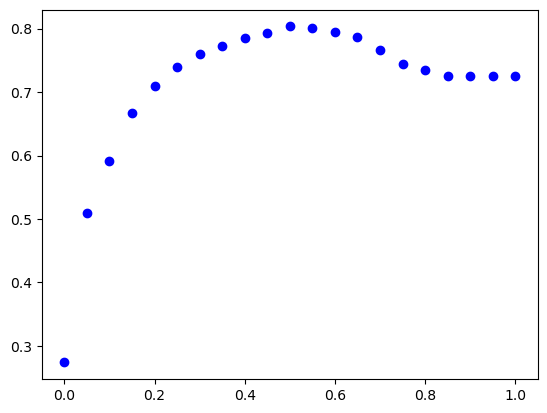

In [26]:
thresholds = np.linspace(0, 1, 21)

for t in thresholds:
    churn_decision = y_pred >= t
    acc = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, acc))
    plt.plot(t, acc, 'bo')

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

## Confusion table

In [28]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()


In [29]:
# sklearn confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred >= 0.5)

array([[922, 101],
       [176, 210]], dtype=int64)

## Precision and recall

Precision: fraction of positive predictions turned out to be correct. True positive predictions divided by all positive predictions.

In [32]:
precision = tp / (tp + fp)
precision

0.6752411575562701

Recall: fraction of correctly identified positive examples. 

In [33]:
recall = tp / (tp + fn)
recall

0.5440414507772021

Recall and precision are a significantly more informative metrics than accuracy. Here the value of recall indicates that our model failed to identify 46% of the positive examples and incorrectly labelled 33% of the negative examples as positive.

The precision metric examines the cases that our model predicts to be correct and considers the fraction of these cases where the prediction in correct. Conversely, recall examines the cases that are actually correct and considers the fraction of these cases that our model predicts to be correct.

## ROC Curves